











# ***Import Libraries***

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import keras
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# ***Reading Data***

In [2]:
folder=os.listdir('/kaggle/input/segment/data')
folder.sort()
folder

['images', 'masks']

In [3]:
# Sort the image and mask filenames to ensure they match
image_files = sorted(os.listdir('/kaggle/input/segment/data/images'))
mask_files = sorted(os.listdir('/kaggle/input/segment/data/masks'))

print(image_files[:5])
print("=================")
print(mask_files[:5])

['1.jpg', '1.png', '10.png', '100.png', '1000.png']
['1.jpg', '1.png', '10.png', '100.png', '1000.png']


In [4]:
def display_images_masks(imagepath, maskpath):

        count = 0

        for image_file, mask_file in zip(image_files, mask_files):

            if count >= 4:  # Display only the first 4 images from each folder
                break


            imagepath_full = os.path.join(imagepath, image_file)
            maskpath_full = os.path.join(maskpath, mask_file)

            image = cv2.imread(imagepath_full)
            mask = cv2.imread(maskpath_full)

            if image is None:
                raise ValueError(f"Image at path {imagepath_full} could not be loaded")
            if mask is None:
                raise ValueError(f"Mask at path {maskpath_full} could not be loaded")

            plt.figure(figsize=(10, 10))

            # First subplot (image)
            plt.subplot(1, 3, 1)
            plt.imshow(image)
            plt.title('Image')

            # Second subplot (mask)
            plt.subplot(1, 3, 2)
            plt.imshow(mask)
            plt.title('Mask')

            # Third subplot (Image with Contours)
            plt.subplot(1, 3, 3)

            sample = np.array(np.squeeze(mask), dtype = np.uint8)
            contours, hier = cv2.findContours(sample[:,:,1],cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
            sample_over_gt = cv2.drawContours(image, contours, -1,[0,255,0], thickness=-1)
            plt.imshow(sample_over_gt)
            plt.title('Image with Contours')


            plt.show()
            count += 1

In [5]:
IMAGES_PATH='/kaggle/input/segment/data/images'
MASKS_PATH='/kaggle/input/segment/data/masks'

SIZE=256
CHANNEL=1

Num_Of_Classes=1

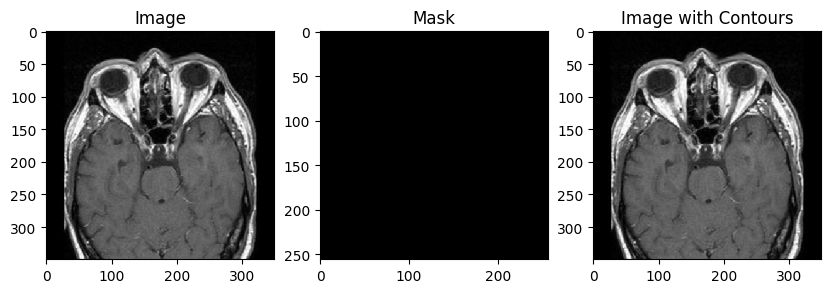

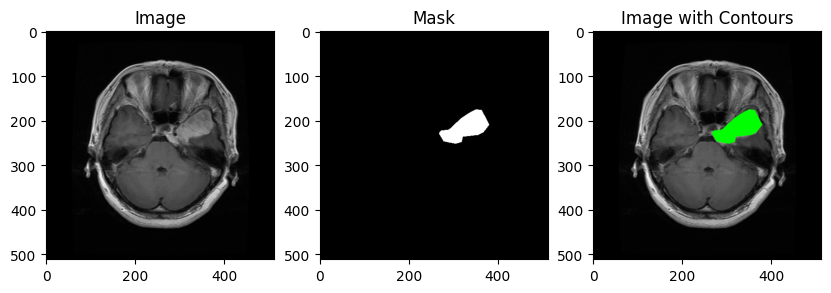

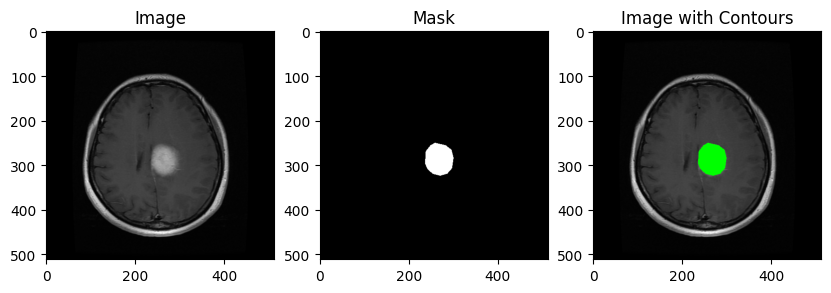

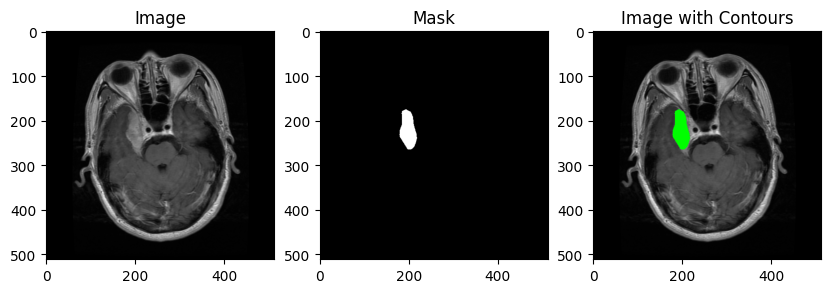

In [6]:
display_images_masks(IMAGES_PATH,MASKS_PATH)

# ***Show Different Size of Images***

In [8]:
images_size=[]
masks_size=[]

for image_file, mask_file in tqdm(zip(image_files, mask_files)):

    

    imagepath_full = os.path.join(IMAGES_PATH, image_file)
    maskpath_full = os.path.join(MASKS_PATH, mask_file)

    image = cv2.imread(imagepath_full)
    mask = cv2.imread(maskpath_full)

    images_size.append(image.shape)
    masks_size.append(mask.shape)

3494it [00:48, 72.05it/s] 


In [9]:
# import tensorflow as tf
# tf.keras.backend.clear_session()


In [10]:
print(list(set(images_size)))
print("=================")
print(list(set(masks_size)))

[(488, 504, 3), (263, 236, 3), (290, 236, 3), (717, 717, 3), (444, 468, 3), (243, 236, 3), (674, 648, 3), (1446, 1375, 3), (302, 216, 3), (512, 434, 3), (251, 447, 3), (250, 201, 3), (274, 230, 3), (252, 236, 3), (442, 442, 3), (320, 296, 3), (228, 233, 3), (218, 233, 3), (480, 853, 3), (725, 728, 3), (248, 208, 3), (484, 405, 3), (600, 600, 3), (483, 430, 3), (417, 428, 3), (506, 444, 3), (630, 630, 3), (223, 236, 3), (344, 320, 3), (228, 235, 3), (273, 236, 3), (236, 236, 3), (504, 450, 3), (244, 206, 3), (470, 469, 3), (273, 251, 3), (214, 229, 3), (496, 453, 3), (264, 235, 3), (248, 203, 3), (1024, 1024, 3), (295, 236, 3), (277, 235, 3), (217, 232, 3), (600, 494, 3), (247, 204, 3), (216, 232, 3), (280, 229, 3), (216, 236, 3), (244, 262, 3), (201, 210, 3), (236, 211, 3), (236, 255, 3), (777, 622, 3), (218, 225, 3), (442, 332, 3), (469, 387, 3), (257, 235, 3), (264, 210, 3), (225, 234, 3), (315, 236, 3), (222, 233, 3), (486, 421, 3), (830, 1024, 3), (512, 416, 3), (583, 1000, 3), (25

# ***Preprocessing Images & Masks***

In [7]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def preprocessing_images_masks():
    images = []
    masks = []

    for image_file, mask_file in tqdm(zip(image_files, mask_files)):
        # مسار الصورة والقناع
        imagepath_full = os.path.join(IMAGES_PATH, image_file)
        maskpath_full = os.path.join(MASKS_PATH, mask_file)

        # قراءة الصورة والقناع
        image = cv2.imread(imagepath_full, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (SIZE, SIZE))
        image = image / 255.0

        mask = cv2.imread(maskpath_full, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (SIZE, SIZE))
        mask = mask / 255.0

        # تطبيق Augmentation (الانعكاس الأفقي على الصورة والقناع)
        image_flipped = cv2.flip(image, 1)  # 1 يعني انعكاس أفقي
        mask_flipped = cv2.flip(mask, 1) 
        # 1 يعني انعكاس أفقي
    

        # إضافة الصور والقناع المعدلين إلى القائمة
        images.append(image)
        masks.append(mask)
        images.append(image_flipped)  # إضافة الصورة المنعكسة
        masks.append(mask_flipped)  # إضافة القناع المنعكس
    

    return np.expand_dims(np.array(images), axis=-1), np.expand_dims(np.array(masks), axis=-1)


In [8]:
x, y = preprocessing_images_masks()

3494it [00:44, 77.69it/s] 


In [9]:
print('The Shape of X',x.shape)
print('The Shape of y',y.shape)

The Shape of X (6988, 256, 256, 1)
The Shape of y (6988, 256, 256, 1)


# ***Split Data into Training & Testing***

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [11]:
print('The shape of X_train',X_train.shape)
print('The shape of y_train',Y_train.shape)
print('The shape of X_test',X_test.shape)
print('The shape of y_test',Y_test.shape)

The shape of X_train (4891, 256, 256, 1)
The shape of y_train (4891, 256, 256, 1)
The shape of X_test (2097, 256, 256, 1)
The shape of y_test (2097, 256, 256, 1)


In [12]:
 x_validation,x_test ,y_validation, y_test = train_test_split(X_test,Y_test , test_size=0.3, random_state=0)

In [13]:
print('The shape of X_train' ,x_validation.shape)
print('The shape of y_train',y_validation.shape)
print('The shape of X_test',x_test.shape)
print('The shape of y_test',y_test.shape)

The shape of X_train (1467, 256, 256, 1)
The shape of y_train (1467, 256, 256, 1)
The shape of X_test (630, 256, 256, 1)
The shape of y_test (630, 256, 256, 1)


# ***Defineing Loss Function and Metrics***

In [14]:
import tensorflow as tf

smooth = 1e-15

def dice_coef(y_true, y_pred):
    # تحويل المدخلات إلى نوع float32 لتجنب مشاكل الحساب
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Flatten لتحويل المدخلات إلى شكل 1D
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    
    # حساب تقاطع Dice
    intersection = tf.reduce_sum(y_true * y_pred)
    
    # حساب Dice Coefficient
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)


***Overview***

 U-Net is a convolutional neural network architecture designed for biomedical image segmentation. It was proposed by Olaf Ronneberger et al. in 2015. The architecture is particularly effective for tasks where precise localization of features is required, such as in medical imaging, but has also been successfully applied to various other segmentation tasks.

***Architecture***
* Contracting Path (Encoder): This part captures context through a series of convolutional and max-pooling layers, progressively reducing the spatial dimensions of the feature maps.
* Expanding Path (Decoder): This part enables precise localization through upsampling and concatenation of feature maps from the contracting path.

# ***Build U-Net Architecture***

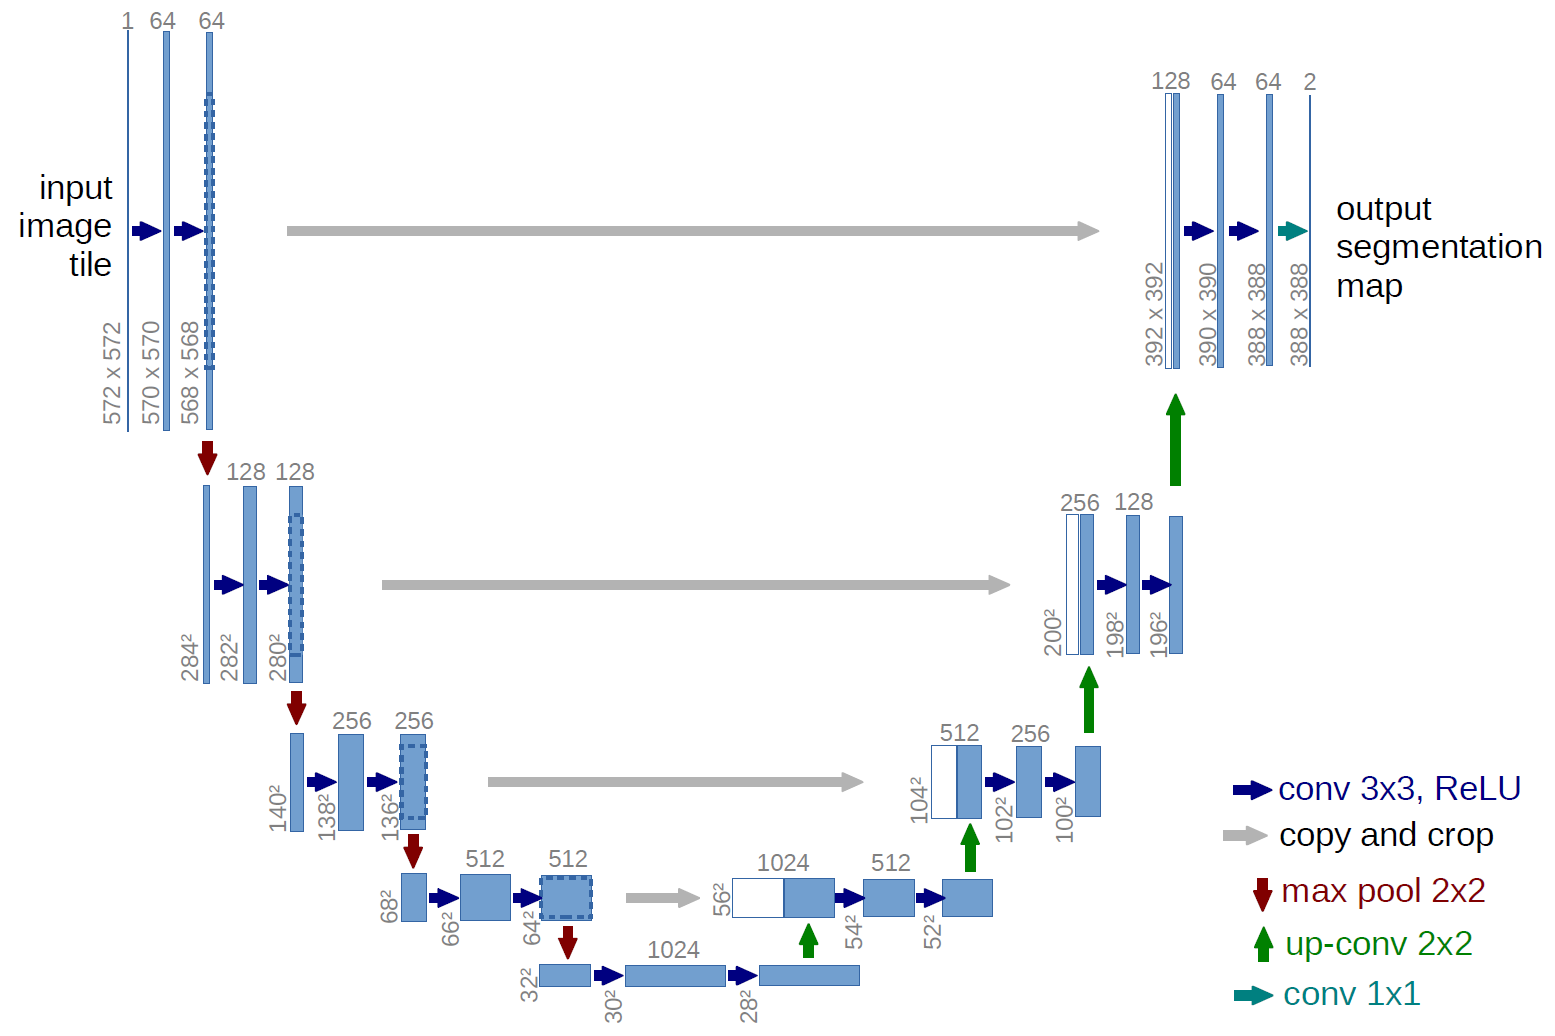

In [39]:
def unet_model(input_size=(SIZE, SIZE, CHANNEL), num_classes=Num_Of_Classes):
    inputs = keras.layers.Input(input_size)

    # Encoding (Downsampling)
    c1 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = keras.layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Decoding (Upsampling)
    u6 = keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = keras.layers.concatenate([u6, c4])
    c6 = keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = keras.layers.concatenate([u7, c3])
    c7 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = keras.layers.concatenate([u8, c2])
    c8 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = keras.layers.concatenate([u9, c1], axis=3)
    c9 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    # Output layer
    outputs = keras.layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(c9)

    model = keras.models.Model(inputs=[inputs], outputs=[outputs])
    
    return model


In [40]:
# Create and compile the model
model = unet_model(input_size=(SIZE, SIZE,CHANNEL), num_classes=Num_Of_Classes)

model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_loss, metrics=['accuracy',dice_coef])

In [41]:
# Summary of the model
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_38[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ conv2d_39[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_40[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_41[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_42[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_43[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_10… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_44[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 16, 16,    │          0 │ conv2d_45[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_11… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_46[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 32, 32,    │  2,097,664 │ conv2d_47[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
ealystopping=tf.keras.callbacks.EarlyStopping(patience=15,
                                            monitor='val_accuracy',
                                            restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                 factor=0.2, 
                                                 patience=10, 
                                                 min_lr=1e-7, 
                                                 mode='min')

In [43]:
# pip install --upgrade tensorflow keras


In [44]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=50,validation_data=(x_validation, y_validation),
          verbose=1, callbacks=[ealystopping,reduce_lr])

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 119s 717ms/step - accuracy: 0.8386 - dice_coef: 0.0394 - loss: 0.9606 - val_accuracy: 0.8857 - val_dice_coef: 0.1312 - val_loss: 0.8688 - learning_rate: 1.0000e-05
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 104s 681ms/step - accuracy: 0.9620 - dice_coef: 0.2249 - loss: 0.7751 - val_accuracy: 0.9754 - val_dice_coef: 0.2986 - val_loss: 0.7014 - learning_rate: 1.0000e-05
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 104s 680ms/step - accuracy: 0.9823 - dice_coef: 0.3500 - loss: 0.6500 - val_accuracy: 0.9848 - val_dice_coef: 0.3823 - val_loss: 0.6176 - learning_rate: 1.0000e-05
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 104s 681ms/step - accuracy: 0.9830 - dice_coef: 0.3820 - loss: 0.6180 - val_accuracy: 0.9860 - val_dice_coef: 0.3908 - val_loss: 0.6090 - learning_rate: 1.0000e-05
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 104s 681ms/step - accuracy: 0.9847 - dice_coef: 0.4240 - loss: 0.5760 - val_accuracy: 0.9862 - val_dice_coef: 0.4605 - val_loss: 0.5392 - learni

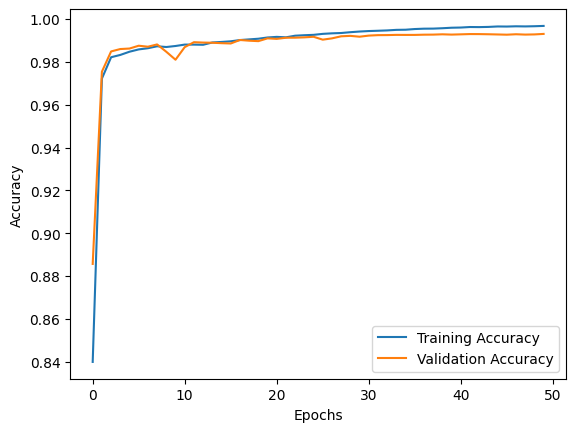

In [45]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

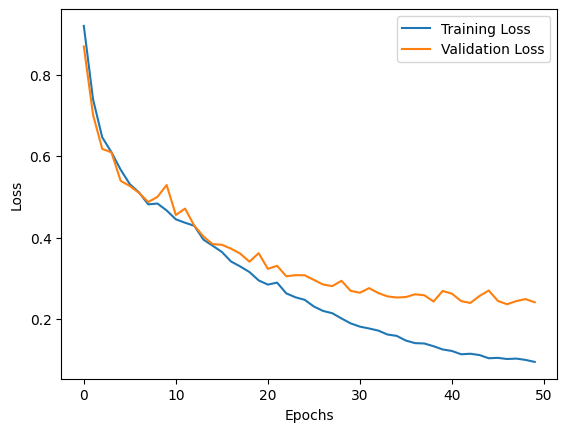

In [46]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [47]:
u_net_loss,u_net_accuracy,u_net_dice_coef=model.evaluate(x_test ,y_test)
print(f'Loss is {u_net_loss}')
print(f'Accuracy is {u_net_accuracy}')
print(f'Dice_Coef is {u_net_dice_coef}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.9933 - dice_coef: 0.7697 - loss: 0.2303
Loss is 0.23176628351211548
Accuracy is 0.993165910243988
Dice_Coef is 0.7682910561561584


In [25]:
print(x_test.shape[0])  # عدد العينات في X_test
print(y_test.shape[0])

630
630


# ***Prediction***

In [48]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(np.uint8)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step


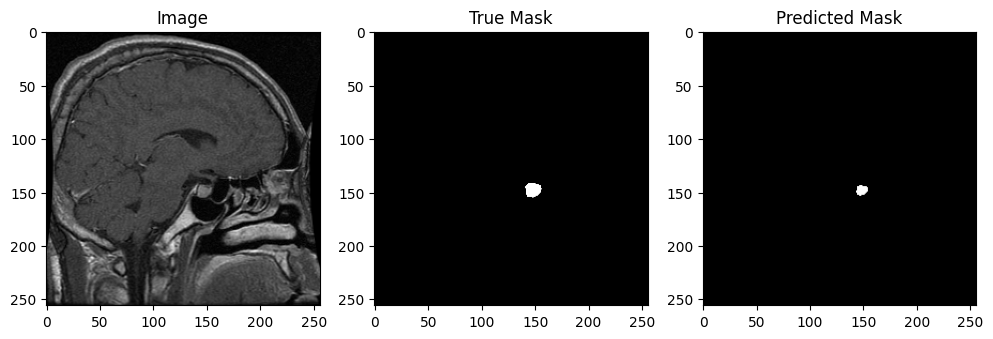

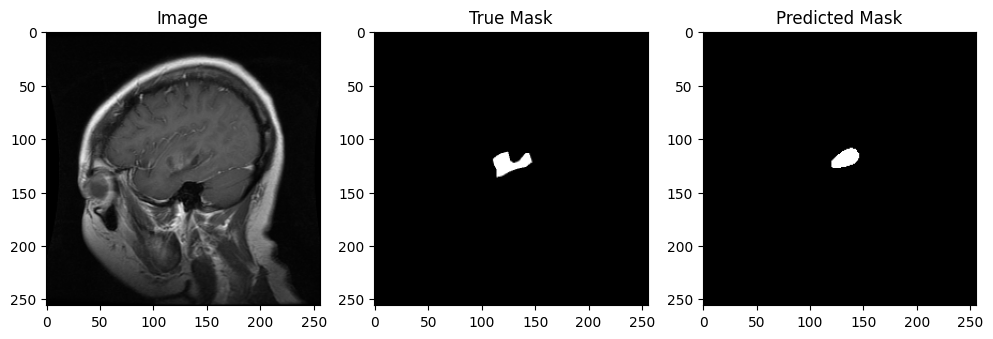

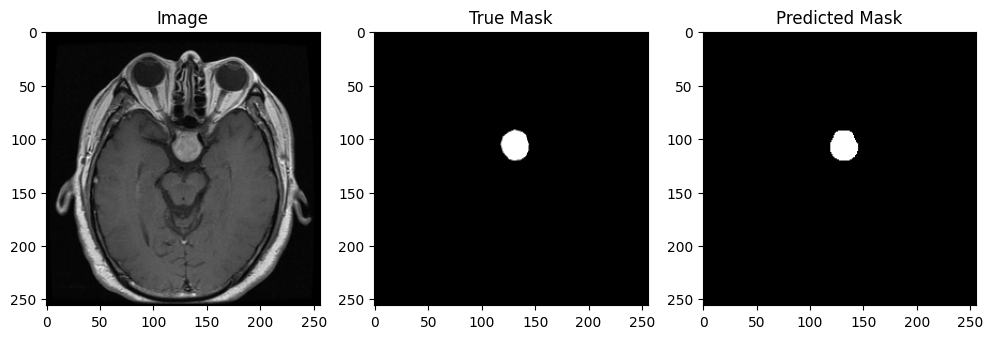

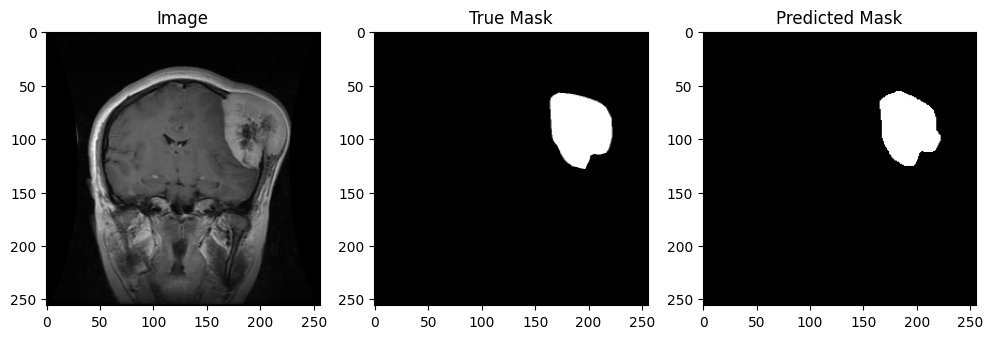

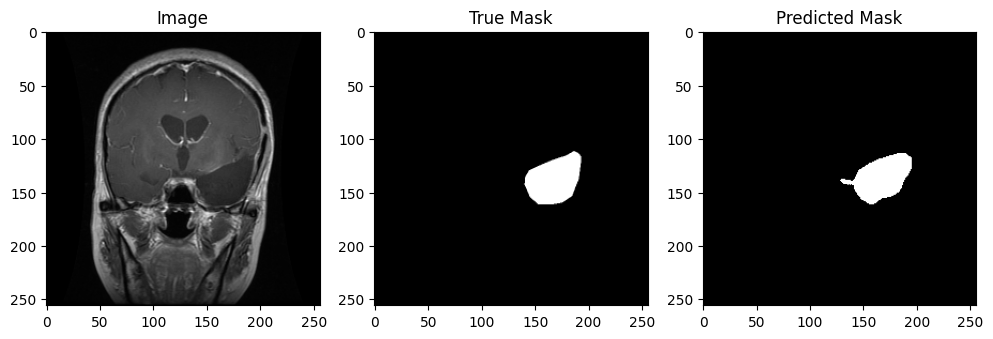

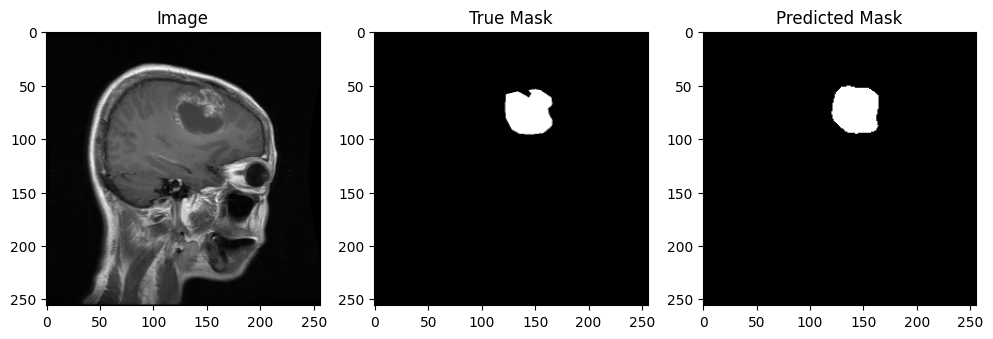

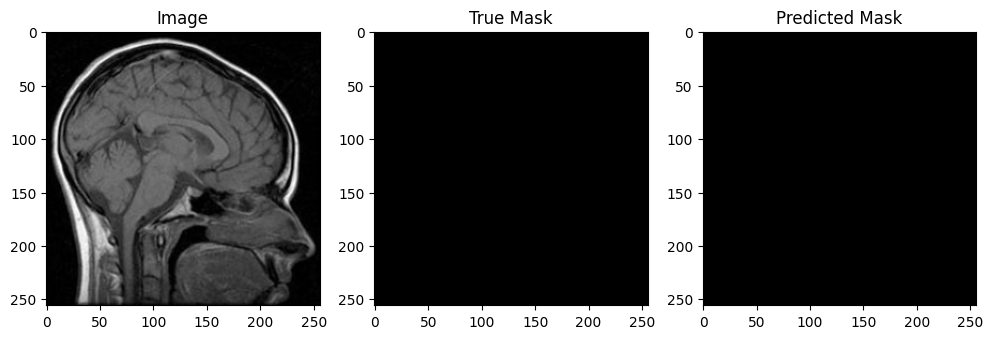

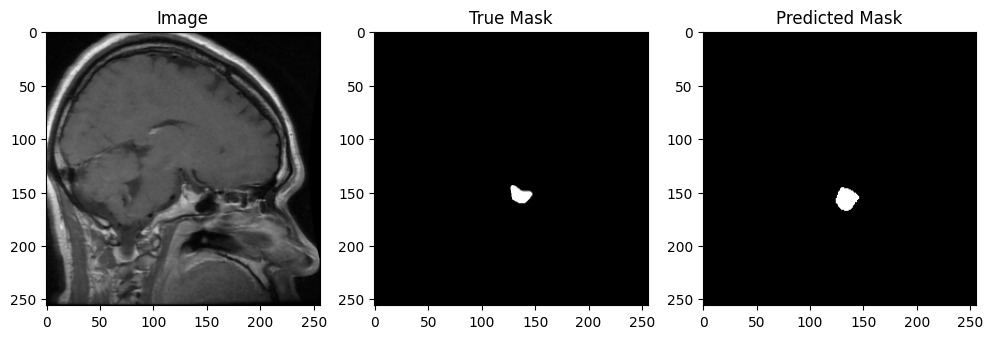

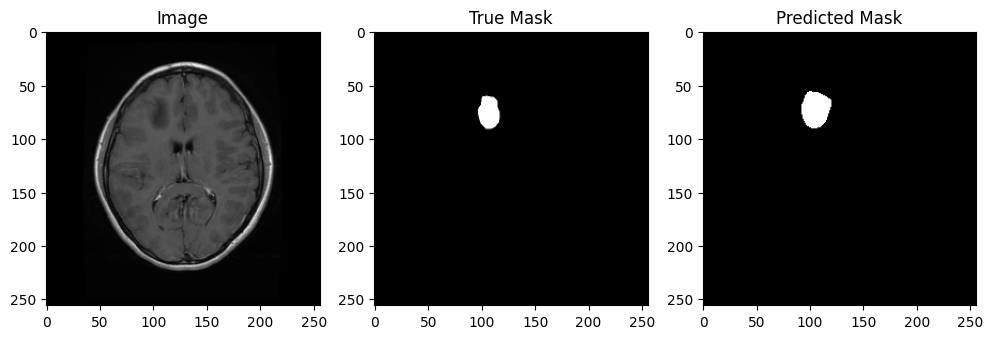

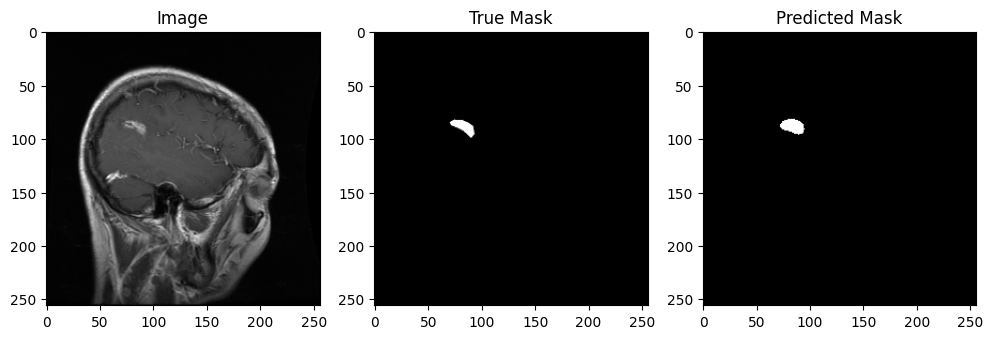

In [53]:
for i in range(10):
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(x_test[i],cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(y_pred[i].squeeze(), cmap='gray')
    
    plt.show()

In [54]:
model.save('segmentmodel.h5')